In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:

# Locate CSVs in resources in folder
net_overseas_migration_larger_states = Path("Resources/Graph 5.1 Net overseas migration(a) - larger states(b) - year ending.csv")
net_overseas_migration_smaller_states = Path("Resources/Graph 5.2 Net overseas migration(a) - smaller states and territories(b) - year ending.csv")

# Load CSV files into DataFrames and remove the first rows (as not relevant data)
df_larger_states_migration = pd.read_csv(net_overseas_migration_larger_states, skiprows=1)
df_smaller_states_migration = pd.read_csv(net_overseas_migration_smaller_states, skiprows=1)

# Merge into one migration dataframe
merged_df_migration = pd.merge(df_larger_states_migration, df_smaller_states_migration, on='Quarter')

#Display migration dataframe
merged_df_migration

# Remove rows with no values 
merged_df_migration = merged_df_migration.dropna(subset=['Quarter'])

# Remove non-date values 
merged_df_migration = merged_df_migration[merged_df_migration['Quarter'].str.match(r'[A-Za-z]{3}-\d{2}')]

# Convert the Quarter column to datetime format (to enable filtering) 
merged_df_migration['Quarter'] = pd.to_datetime(merged_df_migration['Quarter'], format='%b-%y')

# Filter to remove data after December 2021 
merged_df_migration = merged_df_migration[merged_df_migration['Quarter'] <= pd.to_datetime('Dec-21', format='%b-%y')]

# Convert the Quarter column back to original format (for cleaner visualisation)
merged_df_migration['Quarter'] = merged_df_migration['Quarter'].dt.strftime('%b-%y')

#Display cleaned merged migration dataframe
merged_df_migration.head(3)

,Quarter,NSW ('000),Vic. ('000),Qld ('000),WA ('000),SA ('000),Tas. ('000),NT ('000),ACT ('000)
0,Jun-13,66.76,59.03,41.83,42.14,11.68,1.61,4.35,2.92
1,Sep-13,68.86,59.51,37.24,35.35,11.97,1.82,3.68,2.77
2,Dec-13,67.58,58.50,33.46,29.06,12.13,1.79,3.19,2.65


In [4]:

# Convert to percentage movement per quarter
for column in merged_df_migration.columns[1:]:  
    merged_df_migration[column + ' Variation'] = round(merged_df_migration[column].pct_change() * 100,2)
    
# Update first row from 'NaN' to display zero
merged_df_migration.fillna(0, inplace=True)


In [5]:

#Display cleaned merged migration dataframe
merged_df_migration

,Quarter,NSW ('000),Vic. ('000),Qld ('000),WA ('000),SA ('000),Tas. ('000),NT ('000),ACT ('000),NSW ('000) Variation,Vic. ('000) Variation,Qld ('000) Variation,WA ('000) Variation,SA ('000) Variation,Tas. ('000) Variation,NT ('000) Variation,ACT ('000) Variation
0,Jun-13,66.76,59.03,41.83,42.14,11.68,1.61,4.35,2.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Sep-13,68.86,59.51,37.24,35.35,11.97,1.82,3.68,2.77,3.15,0.81,-10.97,-16.11,2.48,13.04,-15.40,-5.14
2,Dec-13,67.58,58.50,33.46,29.06,12.13,1.79,3.19,2.65,-1.86,-1.70,-10.15,-17.79,1.34,-1.65,-13.32,-4.33
3,Mar-14,68.68,59.18,30.97,23.87,12.21,1.82,2.67,2.80,1.63,1.16,-7.44,-17.86,0.66,1.68,-16.30,5.66
4,Jun-14,66.99,56.91,27.22,18.75,11.64,1.80,1.75,2.72,-2.46,-3.84,-12.11,-21.45,-4.67,-1.10,-34.46,-2.86
5,Sep-14,67.67,57.64,24.70,16.39,11.06,1.66,1.56,3.06,1.02,1.28,-9.26,-12.59,-4.98,-7.78,-10.86,12.50
6,Dec-14,68.35,58.39,23.03,15.51,10.97,1.73,1.14,3.21,1.00,1.30,-6.76,-5.37,-0.81,4.22,-26.92,4.90
7,Mar-15,69.44,58.93,21.26,13.99,11.21,1.74,1.21,3.31,1.59,0.92,-7.69,-9.80,2.19,0.58,6.14,3.12
8,Jun-15,70.31,60.69,20.43,14.07,11.15,1.52,2.35,3.50,1.25,2.99,-3.90,0.57,-0.54,-12.64,94.21,5.74
9,Sep-15,71.48,61.96,19.29,13.44,11.29,1.63,1.83,3.30,1.66,2.09,-5.58,-4.48,1.26,7.24,-22.13,-5.71


In [6]:
# Slice the migration dataframe to perform calculations for the Summary Statistics
reduced_migration_df = merged_df_migration[["NSW ('000)", "Vic. ('000)", "Qld ('000)", "WA ('000)",
       "SA ('000)", "Tas. ('000)", "NT ('000)", "ACT ('000)"]]

# Display the sliced dataframe
reduced_migration_df.head(2)

,NSW ('000),Vic. ('000),Qld ('000),WA ('000),SA ('000),Tas. ('000),NT ('000),ACT ('000)
0,66.76,59.03,41.83,42.14,11.68,1.61,4.35,2.92
1,68.86,59.51,37.24,35.35,11.97,1.82,3.68,2.77


In [7]:
# Convert the columns names into a list to be used in the plots
states = ['NSW','VIC','QLD','WA','SA','TAS','NT','ACT']

# Create list containers to store the calculations
migration_average_list = []
migration_median_list = []
migration_variance_list = []
migration_stddev_list = []
migration_max_list = []
migration_min_list = []
net_migration_list = []

# Create a loop through the columns from the reduced_property_df to make the calculations
for columns in reduced_migration_df:
    # calculate the mean for the column
    migration_mean = round(reduced_migration_df[columns].mean(),2)
    # append the calculated mean into the container
    migration_average_list.append(migration_mean)
    # calculate the median for the column
    migration_median = round(reduced_migration_df[columns].median(),2)
    # append the calculated median into the container
    migration_median_list.append(migration_median)
    # calculate the variance for the column
    migration_variance = round(reduced_migration_df[columns].var(),2)
    # append the calculated variance into the container
    migration_variance_list.append(migration_variance)
    # calculate the standard deviation for the column
    migration_std_dev = round(reduced_migration_df[columns].std(),2)
    # append the calculated standard deviation into the container
    migration_stddev_list.append(migration_std_dev)
    # find the maximum value of the column
    migration_max = round(reduced_migration_df[columns].max(),2)
    # append the maximum value into the container
    migration_max_list.append(migration_max)
    # find the minimum value of the column
    migration_min = round(reduced_migration_df[columns].min(),2)
    # append the minimum value into the container
    migration_min_list.append(migration_min)
    # calculate the net migration across the timeframe of the dataset
    net_migration = reduced_migration_df[columns].sum()
    # append the net migration into the container
    net_migration_list.append(net_migration)


In [8]:
# Create a dataframe to summarise the statistics calculated for further analysis
summary_stats_migration_df = pd.DataFrame({'States':states,
                           'Average':migration_average_list,
                           'Median':migration_median_list,
                           'Variance':migration_variance_list,
                           'Standard Deviation':migration_stddev_list,
                           'Max': migration_max_list,
                           'Min': migration_min_list,
                           "Net Migration (2013-2021) ('000)": net_migration_list
                           })

In [9]:

# Display the summary statistics
summary_stats_migration_df

,States,Average,Median,Variance,Standard Deviation,Max,Min,Net Migration (2013-2021) ('000)
0,NSW,67.32,72.84,1058.30,32.53,105.50,-15.38,2356.35
1,VIC,57.03,64.19,1709.32,41.34,91.29,-52.99,1996.02
2,QLD,23.50,27.74,206.33,14.36,41.83,-15.19,822.49
3,WA,14.88,13.44,103.75,10.19,42.14,-5.43,520.77
4,SA,10.72,11.99,26.40,5.14,18.03,-3.26,375.28
5,TAS,2.08,1.82,1.10,1.05,4.00,-0.32,72.65
6,NT,1.33,1.14,1.10,1.05,4.35,-0.50,46.45
7,ACT,2.51,3.21,4.30,2.07,4.60,-3.15,87.75


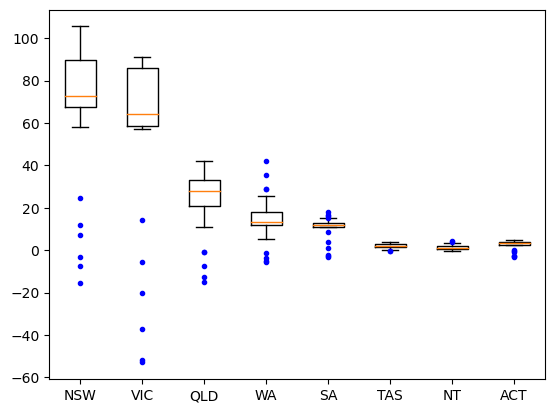

In [10]:
# Create a box plot chart with the data from the migration dataframe
plt.boxplot(reduced_migration_df, labels = states, sym = '.b')

plt.show()

In [11]:
# Locate CSVs in resources in folder
residential_property_price_indexes = Path("Resources/Residential Property Price Indexes, capital cities.csv")

#Load CSV file into DataFrame and remove the first row (as not relevant data)
df_property_price_indexes = pd.read_csv(residential_property_price_indexes, skiprows=1)

# Remove rows with no values 
df_property_price_indexes = df_property_price_indexes.dropna(subset=['Quarter'])

# Remove non-date values 
df_property_price_indexes = df_property_price_indexes[df_property_price_indexes['Quarter'].str.match(r'[A-Za-z]{3}-\d{2}')]

# Convert the Quarter column to datetime format (to enable filtering)
df_property_price_indexes['Quarter'] = pd.to_datetime(df_property_price_indexes['Quarter'], format='%b-%y')

# Filter to remove data pre June 2013 (to align data range with migration data)
df_property_price_indexes = df_property_price_indexes[df_property_price_indexes['Quarter'] >= pd.to_datetime('Jun-13', format='%b-%y')]

# Convert the Quarter column back to original format for cleaner visualisation
df_property_price_indexes['Quarter'] = df_property_price_indexes['Quarter'].dt.strftime('%b-%y')


In [12]:
# Reorganising the columns to align with the order of the migration data (swap Adelaide and Perth)
df_property_price_indexes = df_property_price_indexes[["Quarter", "Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "Hobart", "Darwin", "Canberra"]]
df_property_price_indexes.head(2)

,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1


In [29]:
# Convert the indexes into percentage movement per quarter
for column in df_property_price_indexes.columns[1:]:  
    df_property_price_indexes[column + ' Variation'] = round(df_property_price_indexes[column].pct_change() * 100,2)
    
# Update first row from 'NaN' to display zero
df_property_price_indexes.fillna(0, inplace=True)

#Display cleaned dataframe
df_property_price_indexes.head()

,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra,Sydney Variation,...,Darwin Variation Variation Variation,Canberra Variation Variation Variation,Sydney Variation Variation Variation Variation,Melbourne Variation Variation Variation Variation,Brisbane Variation Variation Variation Variation,Perth Variation Variation Variation Variation,Adelaide Variation Variation Variation Variation,Hobart Variation Variation Variation Variation,Darwin Variation Variation Variation Variation,Canberra Variation Variation Variation Variation
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1,3.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Dec-13,119.0,109.7,107.1,113.9,104.4,103.3,112.8,101.8,5.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Mar-14,121.7,110.7,108.5,114.8,105.4,103.7,114.0,102.3,2.27,...,-105.37,-104.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,Jun-14,126.0,112.1,110.5,114.8,105.6,104.1,114.7,103.3,3.53,...,97.63,-444.95,-14.68,-74.56,24.79,-136.77,-115.29,-39.31,-192.65,324.13
11,Sep-14,128.8,113.1,111.0,114.5,106.1,104.4,114.4,103.5,2.22,...,235.97,-180.61,-14.22,16.40,54.66,inf,-1781.86,inf,141.70,-59.41
12,Dec-14,133.4,115.2,112.3,114.5,107.3,105.2,113.7,104.3,3.57,...,-194.39,-478.69,58.14,167.10,8.76,-100.00,-98.34,-100.00,-182.38,165.04
13,Mar-15,137.6,115.9,112.7,114.4,108.0,105.7,113.5,105.4,3.15,...,-152.36,-88.09,-54.77,-65.68,-54.05,-inf,2665.39,-83.54,-21.62,-81.60
14,Jun-15,149.8,120.8,113.7,113.4,108.5,105.7,112.6,106.2,8.87,...,-580.76,-175.96,1277.69,508.13,118.22,-100.00,-76.05,-234.85,281.18,99.75
15,Sep-15,154.4,124.3,115.2,110.7,109.8,106.2,112.1,107.6,3.07,...,-113.07,-366.76,-91.73,-89.29,-78.51,-20.03,1985.16,-inf,-80.53,108.43


In [14]:
# Slice the Property Dataframe to perform calculations for the Summary Statistics
reduced_property_df = df_property_price_indexes[['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide',
       'Hobart', 'Darwin', 'Canberra']]

# Display the sliced dataframe
reduced_property_df.head(2)


,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra
6,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0
7,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1


In [15]:
# Convert the columns names into a list to be used in the plots
capitals = list(reduced_property_df.columns)

# Create list containers to store the calculations
property_prices_average_list = []
property_prices_median_list = []
property_prices_variance_list = []
property_prices_stddev_list = []
property_prices_max_list = []
property_prices_min_list = []
property_prices_total_variation = []

# Create a loop through the columns from the reduced_property_df to make the calculations
for columns in reduced_property_df:
    # calculate the mean for the column
    property_prices_mean = round(reduced_property_df[columns].mean(),2)
    # append the calculated mean into the container
    property_prices_average_list.append(property_prices_mean)
    # calculate the median for the column
    property_prices_median = round(reduced_property_df[columns].median(),2)
    # append the calculated median into the container
    property_prices_median_list.append(property_prices_median)
    # calculate the variance for the column
    property_prices_variance = round(reduced_property_df[columns].var(),2)
    # append the calculated variance into the container
    property_prices_variance_list.append(property_prices_variance)
    # calculate the standard deviation for the column
    property_prices_std_dev = round(reduced_property_df[columns].std(),2)
    # append the calculated standard deviation into the container
    property_prices_stddev_list.append(property_prices_std_dev)
    # find the maximum value of the column
    property_prices_max = round(reduced_property_df[columns].max(),2)
    # append the maximum value into the container
    property_prices_max_list.append(property_prices_max)
    # find the minimum value of the column
    property_prices_min = round(reduced_property_df[columns].min(),2)
    # append the minimum value into the container
    property_prices_min_list.append(property_prices_min)
    # fetch the data from the first quarter from the dataset
    property_prices_start = reduced_property_df.loc[reduced_property_df.index[0],columns]
    # fetch the data from the last quarter from the dataset
    property_prices_end = reduced_property_df.loc[reduced_property_df.index[-1],columns]
    # calculate the total variation from the first to the last measurement from the dataset
    property_prices_variation = round((property_prices_end - property_prices_start) / property_prices_start * 100, 2)
    # append the total variation calculated into the container
    property_prices_total_variation.append(property_prices_variation)


In [16]:
# Create a list with the capitals latitude and longitude coordinates
cap_latitude = [-33.8678, -37.8142 , -27.4678, -31.9559, -34.9275,-42.8806,-12.4381,-35.2931]
cap_longitude = [151.2100, 144.9631, 153.0281, 115.8606, 138.6000,147.3250,130.8411,149.1269]

In [17]:

# Create a dataframe to summarise the statistics calculated for further analysis
summary_stats_properties_df = pd.DataFrame({'Cities':capitals,
                           'Average':property_prices_average_list,
                           'Median':property_prices_median_list,
                           'Variance':property_prices_variance_list,
                           'Standard Deviation':property_prices_stddev_list,
                           'Max': property_prices_max_list,
                           'Min': property_prices_min_list,
                           'Total Variation (%)': property_prices_total_variation,
                           'Latitude':cap_latitude,
                           'Longitude':cap_longitude 
                           })

In [18]:
# Display the summary statistics
summary_stats_properties_df

,Cities,Average,Median,Variance,Standard Deviation,Max,Min,Total Variation (%),Latitude,Longitude
0,Sydney,158.91,160.5,622.74,24.95,218.7,108.7,101.20,-33.8678,151.2100
1,Melbourne,138.89,142.9,434.45,20.84,185.7,102.7,80.82,-37.8142,144.9631
2,Brisbane,121.75,121.7,146.15,12.09,164.9,103.2,59.79,-27.4678,153.0281
3,Perth,107.69,106.6,35.20,5.93,120.1,98.5,8.59,-31.9559,115.8606
4,Adelaide,117.82,118.7,140.69,11.86,156.3,100.9,54.91,-34.9275,138.6000
5,Hobart,133.72,129.0,864.63,29.40,211.1,100.0,111.10,-42.8806,147.3250
6,Darwin,100.86,100.1,94.07,9.70,114.7,86.9,-8.92,-12.4381,130.8411
7,Canberra,121.25,121.5,295.36,17.19,173.5,101.0,71.78,-35.2931,149.1269


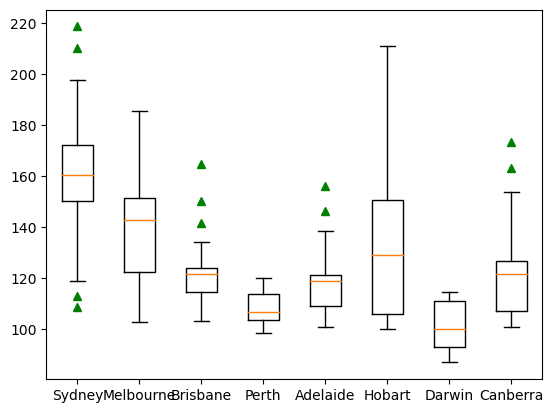

In [19]:
# Create a box plot chart with the data from the property prices dataframe
plt.boxplot(reduced_property_df, labels = capitals, sym = '^g')

plt.show()

In [20]:
migration_total_variation_xaxis = summary_stats_migration_df["Net Migration (2013-2021) ('000)"]
property_total_variation_yaxis = summary_stats_properties_df['Total Variation (%)']


In [21]:
migration_total_variation_xaxis

0    2356.35
1    1996.02
2     822.49
3     520.77
4     375.28
5      72.65
6      46.45
7      87.75
Name: Net Migration (2013-2021) ('000), dtype: float64

In [22]:
property_total_variation_yaxis

0    101.20
1     80.82
2     59.79
3      8.59
4     54.91
5    111.10
6     -8.92
7     71.78
Name: Total Variation (%), dtype: float64

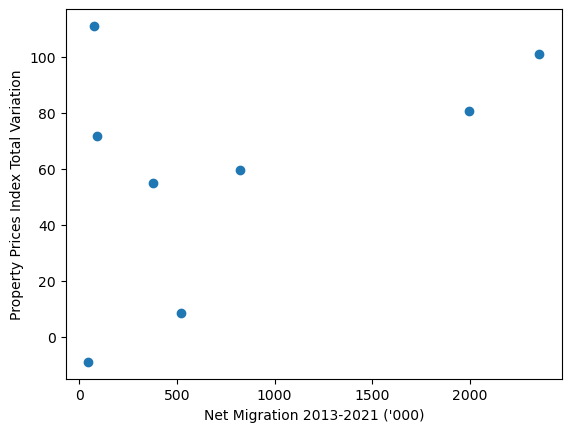

In [35]:
# colours = ['blue','green','yellow','red','black','blue','magenta','pink']
plt.scatter(migration_total_variation_xaxis,property_total_variation_yaxis)
plt.xlabel("Net Migration 2013-2021 ('000)")
plt.ylabel("Property Prices Index Total Variation")
plt.show()

In [17]:
# Slice the migration dataframe to perform calculations for the Summary Statistics
line_chart_df = merged_df_migration[["Quarter","NSW ('000)", "Vic. ('000)", "Qld ('000)", "WA ('000)",
       "SA ('000)", "Tas. ('000)", "NT ('000)", "ACT ('000)"]]

# Display the sliced dataframe
line_chart_df.head(2)

renamed_line_chart_df = line_chart_df.rename(columns={"NSW ('000)":"migration NSW", 
                                                            "Vic. ('000)":"migration Vic",
                                                            "Qld ('000)":"migration QLD",
                                                            "WA ('000)":"migration WA",
                                                            "SA ('000)":"migration SA",
                                                            "Tas. ('000)":"migration TAS",
                                                            "NT ('000)":"migration NT",
                                                            "ACT ('000)":"migration ACT"
                                                    })
renamed_line_chart_df.head(2)

,Quarter,migration NSW,migration Vic,migration QLD,migration WA,migration SA,migration TAS,migration NT,migration ACT
0,Jun-13,66.76,59.03,41.83,42.14,11.68,1.61,4.35,2.92
1,Sep-13,68.86,59.51,37.24,35.35,11.97,1.82,3.68,2.77


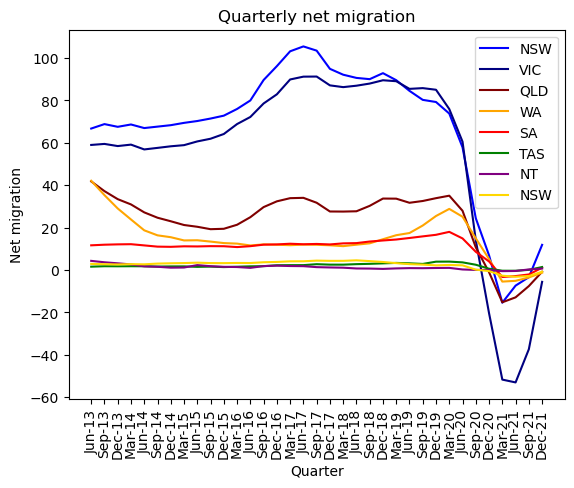

In [21]:
# plot line charts for net migration for each state/territory

x = renamed_line_chart_df["Quarter"]
y_1 = renamed_line_chart_df["migration NSW"]
y_2 = renamed_line_chart_df["migration Vic"]
y_3 = renamed_line_chart_df["migration QLD"]
y_4 = renamed_line_chart_df["migration WA"]
y_5 = renamed_line_chart_df["migration SA"]
y_6 = renamed_line_chart_df["migration TAS"]
y_7 = renamed_line_chart_df["migration NT"]
y_8 = renamed_line_chart_df["migration ACT"]

plt.title("Quarterly net migration")
plt.xlabel("Quarter")
plt.ylabel("Net migration")

NSW, = plt.plot(x, y_1, color="blue", label="NSW")
Vic, = plt.plot(x, y_2, color="navy", label="VIC")
QLD, = plt.plot(x, y_3, color="maroon", label="QLD")
WA, = plt.plot(x, y_4, color="orange", label="WA")
SA, = plt.plot(x, y_5, color="red", label="SA")
TAS, = plt.plot(x, y_6, color="green", label="TAS")
NT, = plt.plot(x, y_7, color="purple", label="NT")
ACT, = plt.plot(x, y_8, color="gold", label="NSW")

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [22]:
# Slice the Property Dataframe to perform calculations for the Summary Statistics
line_property_df = df_property_price_indexes[['Quarter','Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide',
       'Hobart', 'Darwin', 'Canberra']]

# Display the sliced dataframe
line_property_df.head(2)


,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1


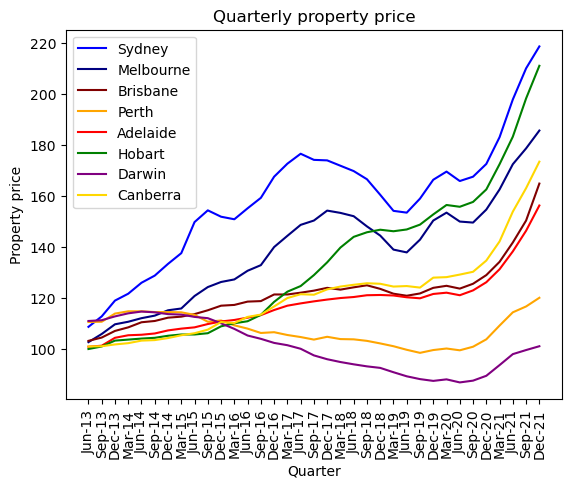

In [23]:
# plot line charts for property price for each capital city
x_p = line_property_df["Quarter"]
y_1_p = line_property_df["Sydney"]
y_2_p = line_property_df["Melbourne"]
y_3_p = line_property_df["Brisbane"]
y_4_p = line_property_df["Perth"]
y_5_p = line_property_df["Adelaide"]
y_6_p = line_property_df["Hobart"]
y_7_p = line_property_df["Darwin"]
y_8_p = line_property_df["Canberra"]

plt.title("Quarterly property price")
plt.xlabel("Quarter")
plt.ylabel("Property price")

Sydney, = plt.plot(x, y_1_p, color="blue", label="Sydney")
Melbourne, = plt.plot(x, y_2_p, color="navy", label="Melbourne")
Brisbane, = plt.plot(x, y_3_p, color="maroon", label="Brisbane")
Perth, = plt.plot(x, y_4_p, color="orange", label="Perth")
Adelaide, = plt.plot(x, y_5_p, color="red", label="Adelaide")
Hobart, = plt.plot(x, y_6_p, color="green", label="Hobart")
Darwin, = plt.plot(x, y_7_p, color="purple", label="Darwin")
Canberra, = plt.plot(x, y_8_p, color="gold", label="Canberra")

plt.legend()
plt.xticks(rotation='vertical')
plt.show()